In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Import necessary libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [57]:
customers=pd.read_csv("/content/drive/MyDrive/Assig/Customers.csv")

In [58]:
products = pd.read_csv('/content/drive/MyDrive/Assig/Products.csv')

In [59]:
transactions = pd.read_csv('/content/drive/MyDrive/Assig/Transactions.csv')

# Descriptive EDA

In [60]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [61]:
customers.shape

(200, 4)

In [62]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [63]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [64]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [65]:
products.shape

(100, 4)

In [66]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [67]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [68]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [69]:
transactions.shape

(1000, 7)

In [70]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [71]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [72]:
# Check for missing values
print("\nMissing values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())


Missing values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [73]:
# Check for duplicate values
print("\nMissing values:")
print("Customers:")
print(customers.duplicated().sum())
print("Products:")
print(products.duplicated().sum())
print("Transactions:")
print(transactions.duplicated().sum())


Missing values:
Customers:
0
Products:
0
Transactions:
0


In [74]:
# Convert dates to datetime
def convert_to_datetime(df, column):
    df[column] = pd.to_datetime(df[column], errors='coerce')

convert_to_datetime(customers, 'SignupDate')
convert_to_datetime(transactions, 'TransactionDate')

# EDA

## Customers

In [75]:
print("\nNumber of customers by region:")
print(customers['Region'].value_counts())


Number of customers by region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-76-6269e9fd47b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


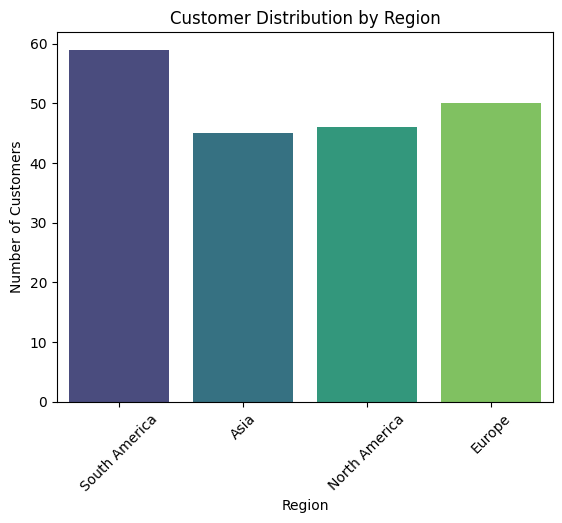

In [76]:
# Plot customer distribution by region
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

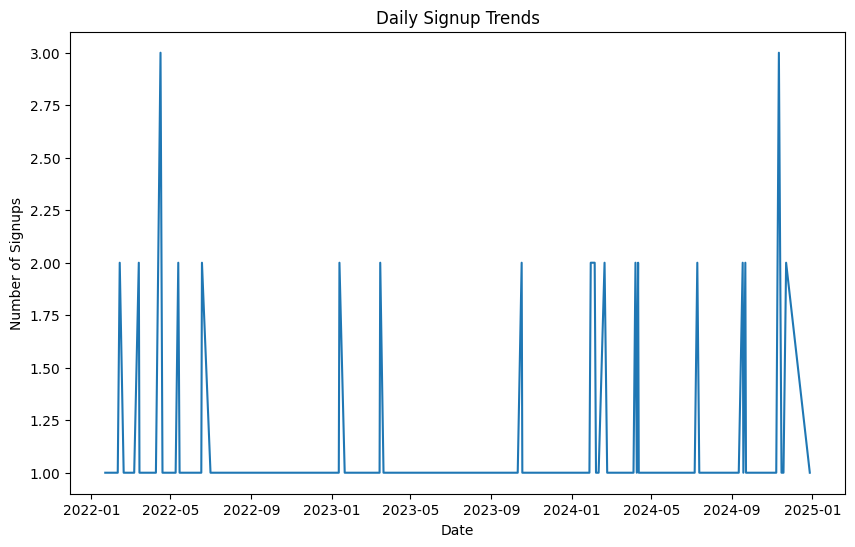

In [77]:
# Signup trends
daily_signups = customers.groupby(customers['SignupDate'].dt.date).size()
daily_signups.plot(kind='line', figsize=(10, 6))
plt.title('Daily Signup Trends')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.show()

In [78]:
# Extract year, month, and day for further analysis
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth'] = customers['SignupDate'].dt.month
customers['SignupDay'] = customers['SignupDate'].dt.day

# Check the distribution of signup dates
customers['SignupYear'].value_counts().sort_index()


,count
SignupYear,
2022,64
2023,57
2024,79


<ipython-input-79-93daae66b0bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='SignupYear',palette="mako")


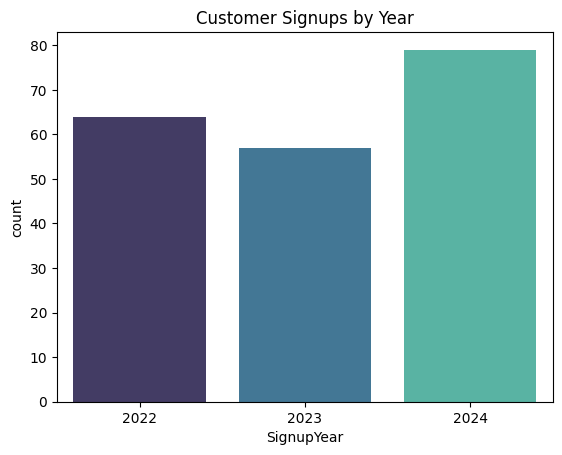

In [79]:
# Signup Year distribution
sns.countplot(data=customers, x='SignupYear',palette="mako")
plt.title('Customer Signups by Year')
plt.show()


In [80]:
# Count customers by month/year
signup_by_month = customers.groupby(['SignupYear', 'SignupMonth']).size().reset_index(name='CustomerCount')
signup_by_month

,SignupYear,SignupMonth,CustomerCount
0,2022,1,1
1,2022,2,7
2,2022,3,8
3,2022,4,8
4,2022,5,8
5,2022,6,5
6,2022,7,4
7,2022,8,4
8,2022,9,6
9,2022,10,3


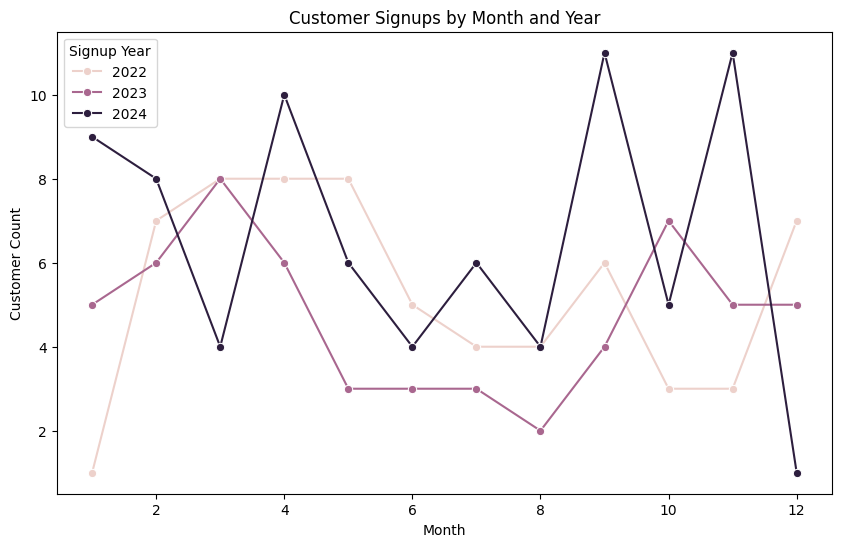

In [81]:
# Line plot for customer signups by year and month
plt.figure(figsize=(10, 6))
sns.lineplot(data=signup_by_month, x='SignupMonth', y='CustomerCount', hue='SignupYear', marker='o')
plt.title('Customer Signups by Month and Year')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.legend(title='Signup Year')
plt.show()

## Products

In [82]:
print("\nProduct categories and counts:")
print(products['Category'].value_counts())


Product categories and counts:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<ipython-input-83-ce7e78ddf298>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='mako')


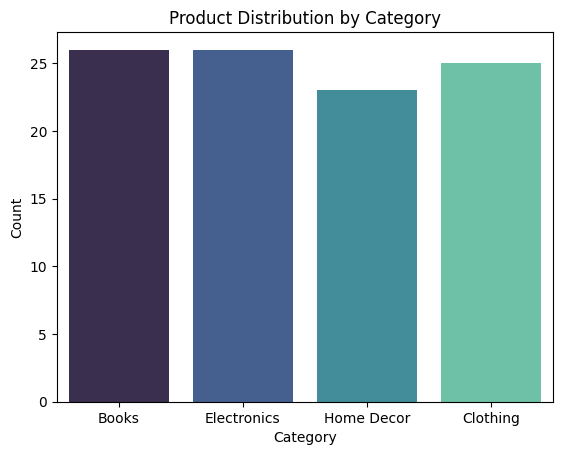

In [83]:
# Plot product category distribution
sns.countplot(data=products, x='Category', palette='mako')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [84]:
# Product price statistics
print("\nProduct Price Statistics:")
print(products['Price'].describe())


Product Price Statistics:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


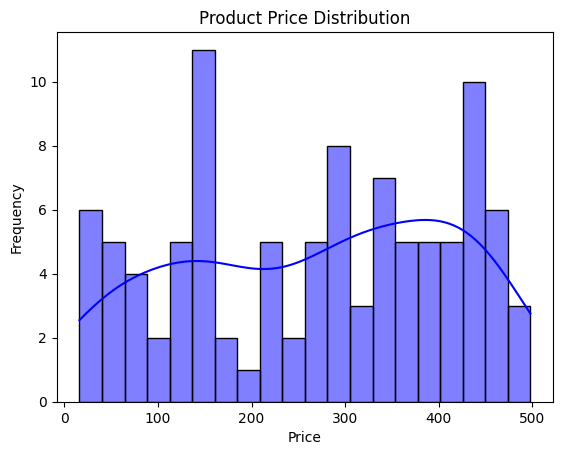

In [85]:
sns.histplot(products['Price'], kde=True, bins=20, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

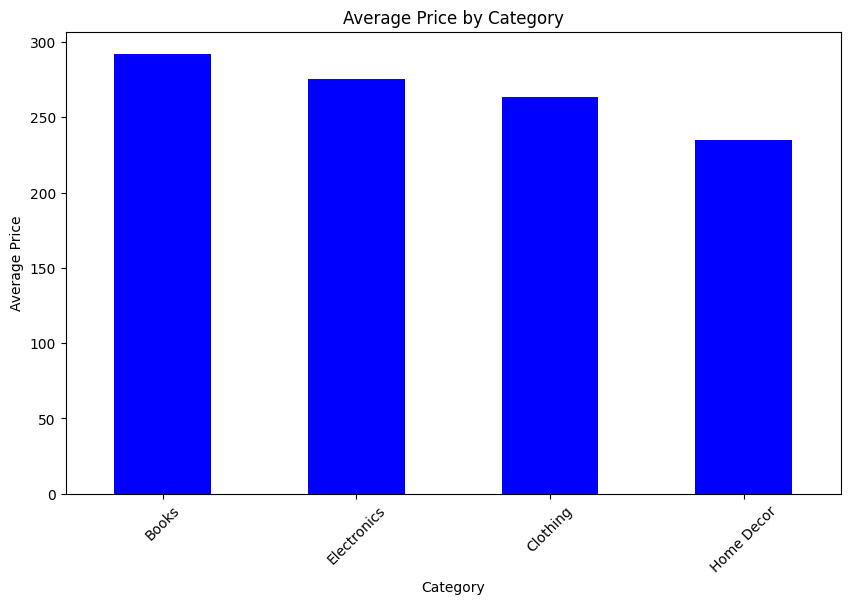

In [86]:
# Average price by category
category_price = products.groupby('Category')['Price'].mean().sort_values(ascending=False)
category_price.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


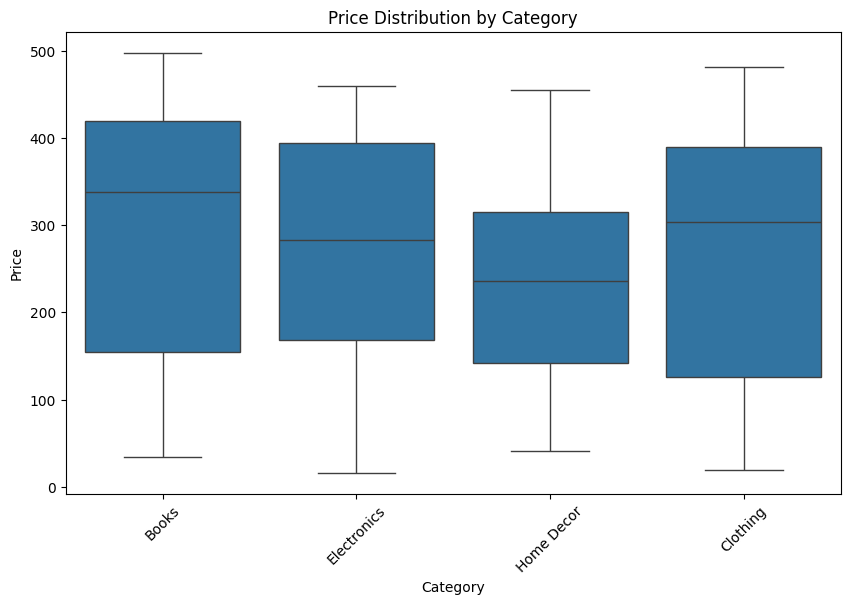

In [87]:
# boxplot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()


## Transactions

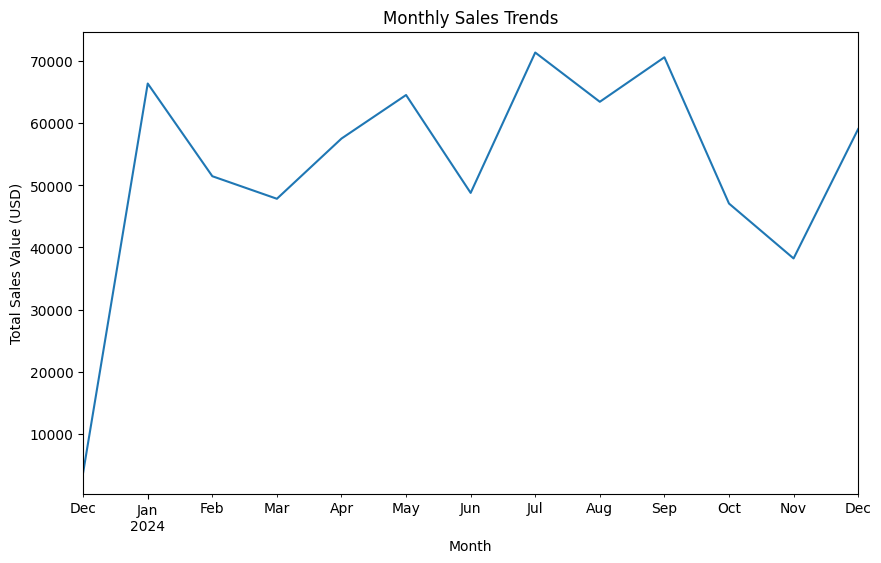

In [88]:
# Monthly sales trends
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.show()

In [89]:
# Top customers by sales
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Sales Value:")
print(top_customers)


Top 10 Customers by Sales Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [90]:
customer_transactions = transactions['CustomerID'].value_counts()
customer_transactions.head()

,count
CustomerID,
C0109,11
C0156,11
C0141,10
C0175,10
C0065,10


In [91]:
product_sales = transactions['ProductID'].value_counts()
product_sales.head()

,count
ProductID,
P059,19
P029,17
P062,16
P079,16
P054,16


In [92]:
# High-performing products
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales Value:")
print(top_products)


Top 10 Products by Sales Value:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


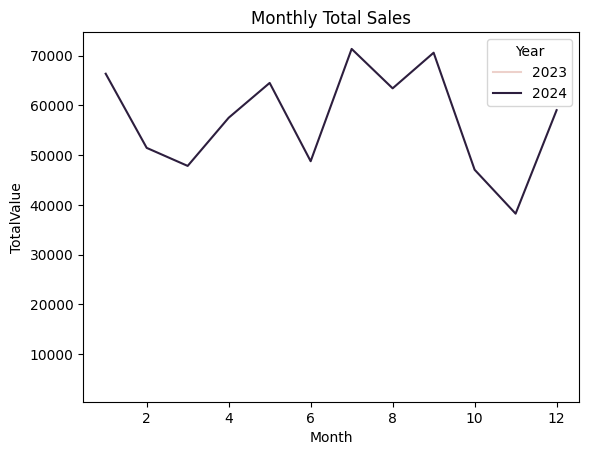

In [93]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month

# Monthly trend
monthly_sales = transactions.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', hue='Year')
plt.title('Monthly Total Sales')
plt.show()

In [94]:
# Correlation analysis
correlation_matrix = transactions[['Price', 'Quantity', 'TotalValue']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Price  Quantity  TotalValue
Price       1.000000 -0.009378    0.722714
Quantity   -0.009378  1.000000    0.609972
TotalValue  0.722714  0.609972    1.000000


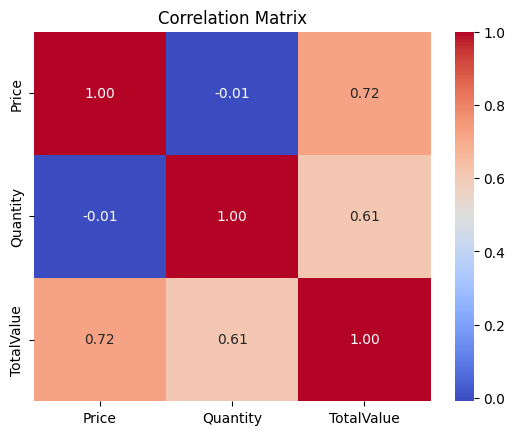

In [95]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Merging files

In [96]:
# Merge customers with transactions on 'CustomerID'
df_merged = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge the result with products on 'ProductID'
df_merged = pd.merge(df_merged, products, on='ProductID', how='left')

# Convert 'TransactionDate' to datetime format
df_merged['TransactionDate'] = pd.to_datetime(df_merged['TransactionDate'])

# Check for any missing values
df_merged.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
Month,0
Year,0
CustomerName,0


In [97]:
# Removing column which have same values
df_merged['Price_x']==df_merged['Price_y']
df_merged=df_merged.drop(columns="Price_y")

# Customer Segmentation

In [98]:
# Number of transactions per customer
customer_transactions = df_merged.groupby('CustomerID')['TransactionID'].count().reset_index()
customer_transactions = customer_transactions.sort_values(by='TransactionID', ascending=False)
print(customer_transactions.head())

    CustomerID  TransactionID
155      C0156             11
108      C0109             11
174      C0175             10
140      C0141             10
64       C0065             10


In [99]:
# Group customers by region
region_sales = df_merged.groupby('Region')['TotalValue'].sum().reset_index()
print(region_sales)


          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


<ipython-input-100-84bedbd0c6e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_sales, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'South America')])

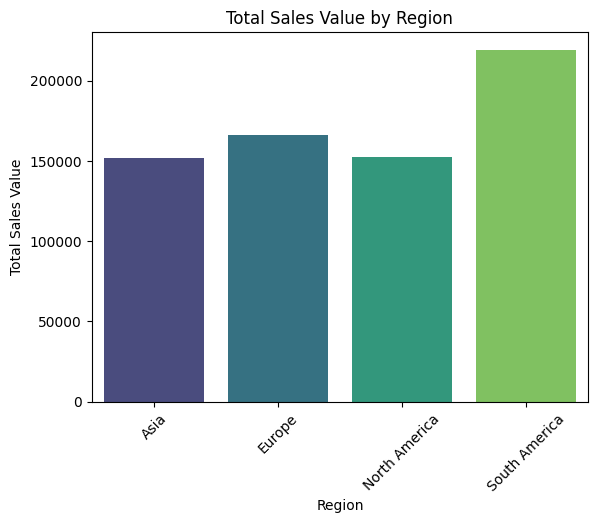

In [100]:
sns.barplot(x='Region', y='TotalValue', data=region_sales, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Value by Region')
plt.xticks(rotation=45)

# Product Analysis

In [101]:
# Most popular products
product_sales = df_merged.groupby('ProductName')['Quantity'].sum().reset_index()
product_sales = product_sales.sort_values(by='Quantity', ascending=False)
print(product_sales.head())


              ProductName  Quantity
9   ActiveWear Smartwatch       100
47   SoundWave Headphones        97
36    HomeSense Desk Lamp        81
6          ActiveWear Rug        79
45     SoundWave Cookbook        78


In [102]:
# Total sales per product category
category_sales = df_merged.groupby('Category')['TotalValue'].sum().reset_index()
print(category_sales)


      Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93
